In [2]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2
from jax import config
config.update("jax_enable_x64", True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from opentn.transformations import create_kitaev_liouvillians, super2ortho, create_trotter_layers
from opentn.stiefel import gradient_stiefel_vec, riemannian_hessian_vec, retract_stiefel
from opentn.optimization import frobenius_norm, model_stiefel_local, get_kitaev_trotter_local_ansatz
from opentn.trust_region_rcopt import riemannian_trust_region_optimize


d, N, gamma = 2, 4, 1
Lvec, Lvec_odd, Lvec_even, Lnn = create_kitaev_liouvillians(N=N, d=d, gamma=gamma, pbc=True)

tau = 0.5
exp_Lvec_4, exp_Lvec_odd, exp_Lvec_even = create_trotter_layers([Lvec, Lvec_odd, Lvec_even], tau=tau)
f_stiefel = lambda xi: frobenius_norm(model_stiefel_local(xi, N, d, ), exp_Lvec_4)
grad_stiefel = lambda xi: gradient_stiefel_vec(xi, f_stiefel, metric='canonical')
hessian_stiefel = lambda xi: riemannian_hessian_vec(xi, f_stiefel, metric='canonical')

xs_n_4 = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=4)]

In [11]:
xs_opt, f_opt, radius_opt = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_n_4, save_x=False, niter=20
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658284696e-05
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658284696e-05
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658284696e-05
radius 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.847453997919718e-05
radius 0.000625
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.443776489397546e-05
radius 0.00125
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.1760963209837824e-05
radius 0.00125
iteration: 6


In [13]:
grad_stiefel_euclidean = lambda xi: gradient_stiefel_vec(xi, f_stiefel, metric='euclidean')
hessian_stiefel_euclidean = lambda xi: riemannian_hessian_vec(xi, f_stiefel, metric='euclidean', stiefel_elementary=False)

In [14]:
xs_opt_euclidean, f_opt_euclidean, radius_opt_euclidean = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel_euclidean, hessian_stiefel_euclidean, xs_n_4, save_x=False, niter=20
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658284696e-05
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658284696e-05
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658284696e-05
radius 0.00015625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658284696e-05
radius 3.90625e-05
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658284696e-05
radius 9.765625e-06
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658284696e-05
radius 2.44140625e-

In [17]:
hessian_stiefel_euclidean_elementary = lambda xi: riemannian_hessian_vec(xi, f_stiefel, metric='euclidean', stiefel_elementary=True)

In [37]:
xs_opt_euclidean_elementary, f_opt_euclidean_elementary, radius_opt_euclidean_elementary = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel_euclidean, hessian_stiefel_euclidean_elementary, xs_n_4, save_x=False, niter=20
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658284696e-05
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658284696e-05
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 5.686635658284696e-05
radius 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.8509921486314255e-05
radius 0.00125
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.439438954482699e-05
radius 0.00125
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 4.280850524708458e-05
radius 0.00125
iteration: 6
c

In [58]:
# plotting
from opentn.utils import plot_pretty

In [138]:
f_opt

[DeviceArray(5.68663566e-05, dtype=float64),
 DeviceArray(5.68663566e-05, dtype=float64),
 DeviceArray(5.68663566e-05, dtype=float64),
 DeviceArray(4.847454e-05, dtype=float64),
 DeviceArray(4.44377649e-05, dtype=float64),
 DeviceArray(4.17609632e-05, dtype=float64),
 DeviceArray(4.07373502e-05, dtype=float64),
 DeviceArray(3.62776033e-05, dtype=float64),
 DeviceArray(3.62776033e-05, dtype=float64),
 DeviceArray(3.57784237e-05, dtype=float64),
 DeviceArray(3.45612754e-05, dtype=float64),
 DeviceArray(3.25836986e-05, dtype=float64),
 DeviceArray(3.08017614e-05, dtype=float64),
 DeviceArray(3.08017614e-05, dtype=float64),
 DeviceArray(2.91689471e-05, dtype=float64),
 DeviceArray(2.91689471e-05, dtype=float64),
 DeviceArray(2.85587147e-05, dtype=float64),
 DeviceArray(2.78089645e-05, dtype=float64),
 DeviceArray(2.64392787e-05, dtype=float64),
 DeviceArray(2.48696539e-05, dtype=float64)]

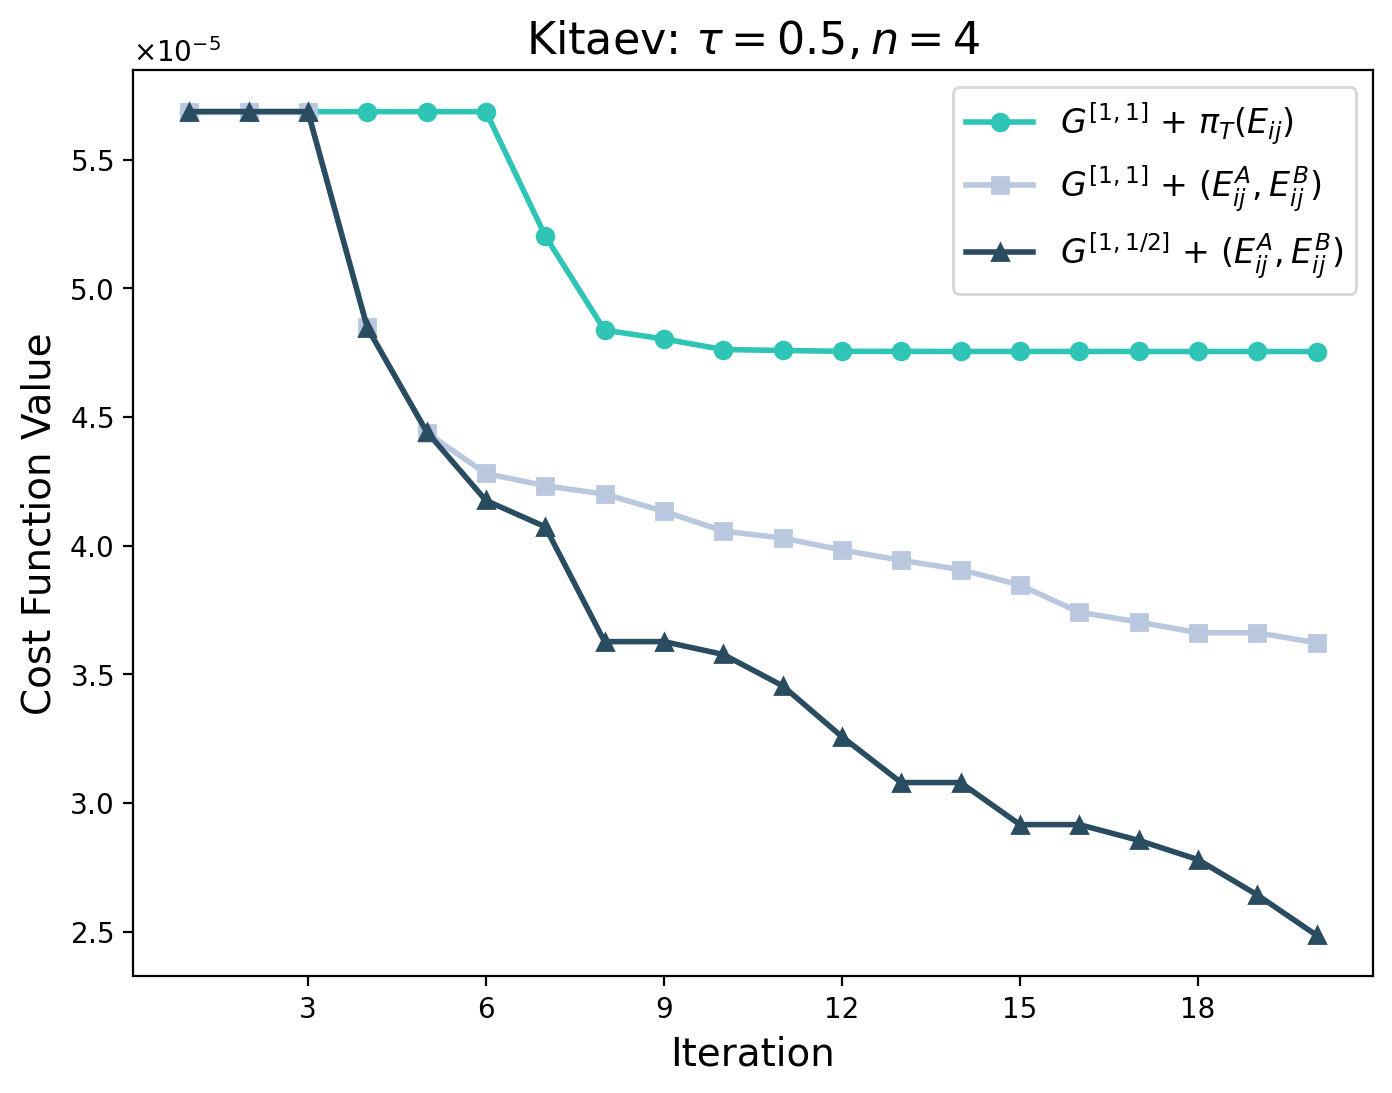

In [127]:
f_kitaev_n4 = [f_opt_euclidean, f_opt_euclidean_elementary, f_opt]
labels = [r'$G^{[1,1]}$ + $\pi_T(E_{ij})$', r'$G^{[1,1]}$ + $(E^A_{ij}, E^B_{ij})$', r'$G^{[1,1/2]}$ + $(E^A_{ij}, E^B_{ij})$']
title = r"Kitaev: $\tau = 0.5,  n = 4$"
fig = plot_pretty(f_kitaev_n4, labels=labels, ylabel="Cost Function Value", xlabel="Iteration", integers=True, title=title, legend_out=False)
# Save the figure as PDF
fig.savefig('../images/thesis/cost_param_kitaev_n4.pdf')

In [141]:
import numpy as np
np.save(file="f_pauli_n4_tau05_rank2", arr=np.array(f_kitaev_n4[-1]))



# See if Euclidean and Canonical have the same behavior for Kitaev wire with 1 timestep

In [39]:
xs_n_1 = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=1)]
xs_opt_n1, f_opt_n1, radius_opt_n1 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_n_1, save_x=False, niter=20
)

iteration: 0
column : 0
column : 1
column : 2
cost function: 0.0009094097438186602
radius 0.01
iteration: 1
column : 0
column : 1
column : 2
cost function: 0.0007849392896681515
radius 0.01
iteration: 2
column : 0
column : 1
column : 2
cost function: 0.0007460237323221594
radius 0.01
iteration: 3
column : 0
column : 1
column : 2
cost function: 0.0007455314479190697
radius 0.01
iteration: 4
column : 0
column : 1
column : 2
cost function: 0.0007455314462203123
radius 0.0025
iteration: 5
column : 0
column : 1
column : 2
cost function: 0.0007455314462203123
radius 0.000625
iteration: 6
column : 0
column : 1
column : 2
cost function: 0.0007455314462203123
radius 0.00015625
iteration: 7
column : 0
column : 1
column : 2
cost function: 0.0007455314462203123
radius 3.90625e-05
iteration: 8
column : 0
column : 1
column : 2
cost function: 0.0007455314462203123
radius 9.765625e-06
iteration: 9
column : 0
column : 1
column : 2
cost function: 0.0007455314462203123
radius 2.44140625e-06
iteration: 10

In [40]:
xs_opt_euclidean_n1, f_opt_euclidean_n1, radius_opt_euclidean_n1 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel_euclidean, hessian_stiefel_euclidean, xs_n_1, save_x=False, niter=20
)

iteration: 0
column : 0
column : 1
column : 2
cost function: 0.0009094097438186602
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
cost function: 0.0009094097438186602
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
cost function: 0.0009094097438186602
radius 0.00015625
iteration: 3
column : 0
column : 1
column : 2
cost function: 0.0009094097438186602
radius 3.90625e-05
iteration: 4
column : 0
column : 1
column : 2
cost function: 0.000836429978977767
radius 3.90625e-05
iteration: 5
column : 0
column : 1
column : 2
cost function: 0.0007742010035924683
radius 9.765625e-06
iteration: 6
column : 0
column : 1
column : 2
cost function: 0.0007664222365396739
radius 9.765625e-06
iteration: 7
column : 0
column : 1
column : 2
cost function: 0.000761346071802737
radius 9.765625e-06
iteration: 8
column : 0
column : 1
column : 2
cost function: 0.0007604925264323439
radius 2.44140625e-06
iteration: 9
column : 0
column : 1
column : 2
cost function: 0.0007604925264323439
radi

In [41]:
xs_opt_euclidean_elementary_n1, f_opt_euclidean_elementary_n1, radius_opt_euclidean_elementary_n1 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel_euclidean, hessian_stiefel_euclidean_elementary, xs_n_1, save_x=False, niter=20
)

iteration: 0
column : 0
column : 1
column : 2
cost function: 0.0009094097438186602
radius 0.01
iteration: 1
column : 0
column : 1
column : 2
cost function: 0.0007849393194675781
radius 0.01
iteration: 2
column : 0
column : 1
column : 2
cost function: 0.0007460237241392452
radius 0.01
iteration: 3
column : 0
column : 1
column : 2
cost function: 0.0007455314489383152
radius 0.01
iteration: 4
column : 0
column : 1
column : 2
cost function: 0.0007455314462208628
radius 0.01
iteration: 5
column : 0
column : 1
column : 2
cost function: 0.0007455314462205205
radius 0.01
iteration: 6
column : 0
column : 1
column : 2
cost function: 0.0007455314462192739
radius 0.0025
iteration: 7
column : 0
column : 1
column : 2
cost function: 0.0007455314462192739
radius 0.000625
iteration: 8
column : 0
column : 1
column : 2
cost function: 0.0007455314462192739
radius 0.00015625
iteration: 9
column : 0
column : 1
column : 2
cost function: 0.0007455314462192739
radius 3.90625e-05
iteration: 10
column : 0
column

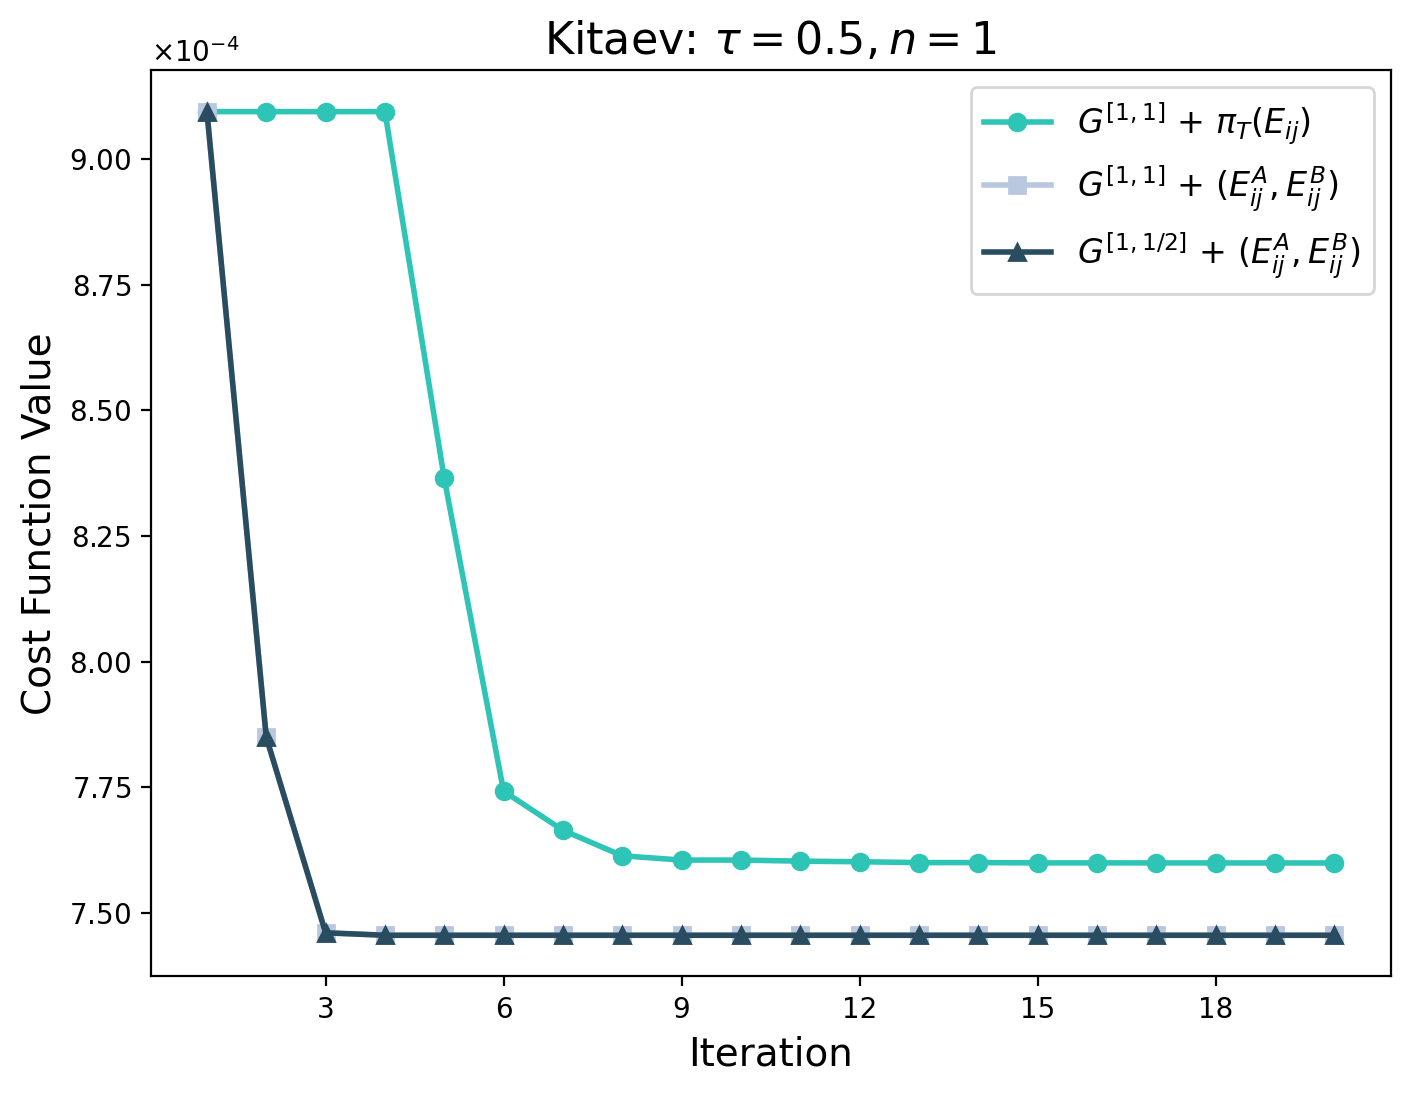

In [134]:
f_kitaev_n1 = [f_opt_euclidean_n1, f_opt_euclidean_elementary_n1, f_opt_n1]

labels = [r'$G^{[1,1]}$ + $\pi_T(E_{ij})$', r'$G^{[1,1]}$ + $(E^A_{ij}, E^B_{ij})$', r'$G^{[1,1/2]}$ + $(E^A_{ij}, E^B_{ij})$']
title = r"Kitaev: $\tau = 0.5,  n = 1$"
fig = plot_pretty(f_kitaev_n1, labels=labels, ylabel="Cost Function Value", xlabel="Iteration", integers=True, title=title, legend_out=False)

fig.savefig('../images/thesis/cost_param_kitaev_n1.pdf')

# what about 3 time steps?

In [95]:
xs_n3 = [super2ortho(x.real, rank=2) for x in get_kitaev_trotter_local_ansatz(gamma, tau, n=3)]
xs_opt_n3, f_opt_n3, radius_opt_n3 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel, hessian_stiefel, xs_n3, save_x=False, niter=10
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.00010109314125955332
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.00010109314125955332
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.00010109314125955332
radius 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 8.683456174452144e-05
radius 0.00125
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 8.057457489310344e-05
radius 0.0025
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 7.75617665244817e-05
radius 0.0025
iteration: 6
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 7.291728994124023e-05
radius 0.0025
iterat

In [113]:
xs_opt_euclidean_n3, f_opt_euclidean_n3, radius_opt_euclidean_n3 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel_euclidean, hessian_stiefel_euclidean, xs_n3, save_x=False, niter=20
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.00010109314125955332
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.00010109314125955332
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.00010109314125955332
radius 0.00015625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.00010109314125955332
radius 3.90625e-05
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.00010109314125955332
radius 9.765625e-06
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.00010109314125955332
radius 9.765625e-06
iteration: 6
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 8.481219160345125e-0

In [96]:
xs_opt_euclidean_elementary_n3, f_opt_euclidean_elementary_n3, radius_opt_euclidean_elementary_n3 = riemannian_trust_region_optimize(
    f_stiefel, retract_stiefel, grad_stiefel_euclidean, hessian_stiefel_euclidean_elementary, xs_n3, save_x=False, niter=10
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.00010109314125955332
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.00010109314125955332
radius 0.000625
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 9.419906102785489e-05
radius 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 8.15524930938982e-05
radius 0.000625
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 7.511184311058447e-05
radius 0.000625
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 7.43295508391174e-05
radius 0.000625
iteration: 6
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 7.365348009365509e-05
radius 0.000625
i

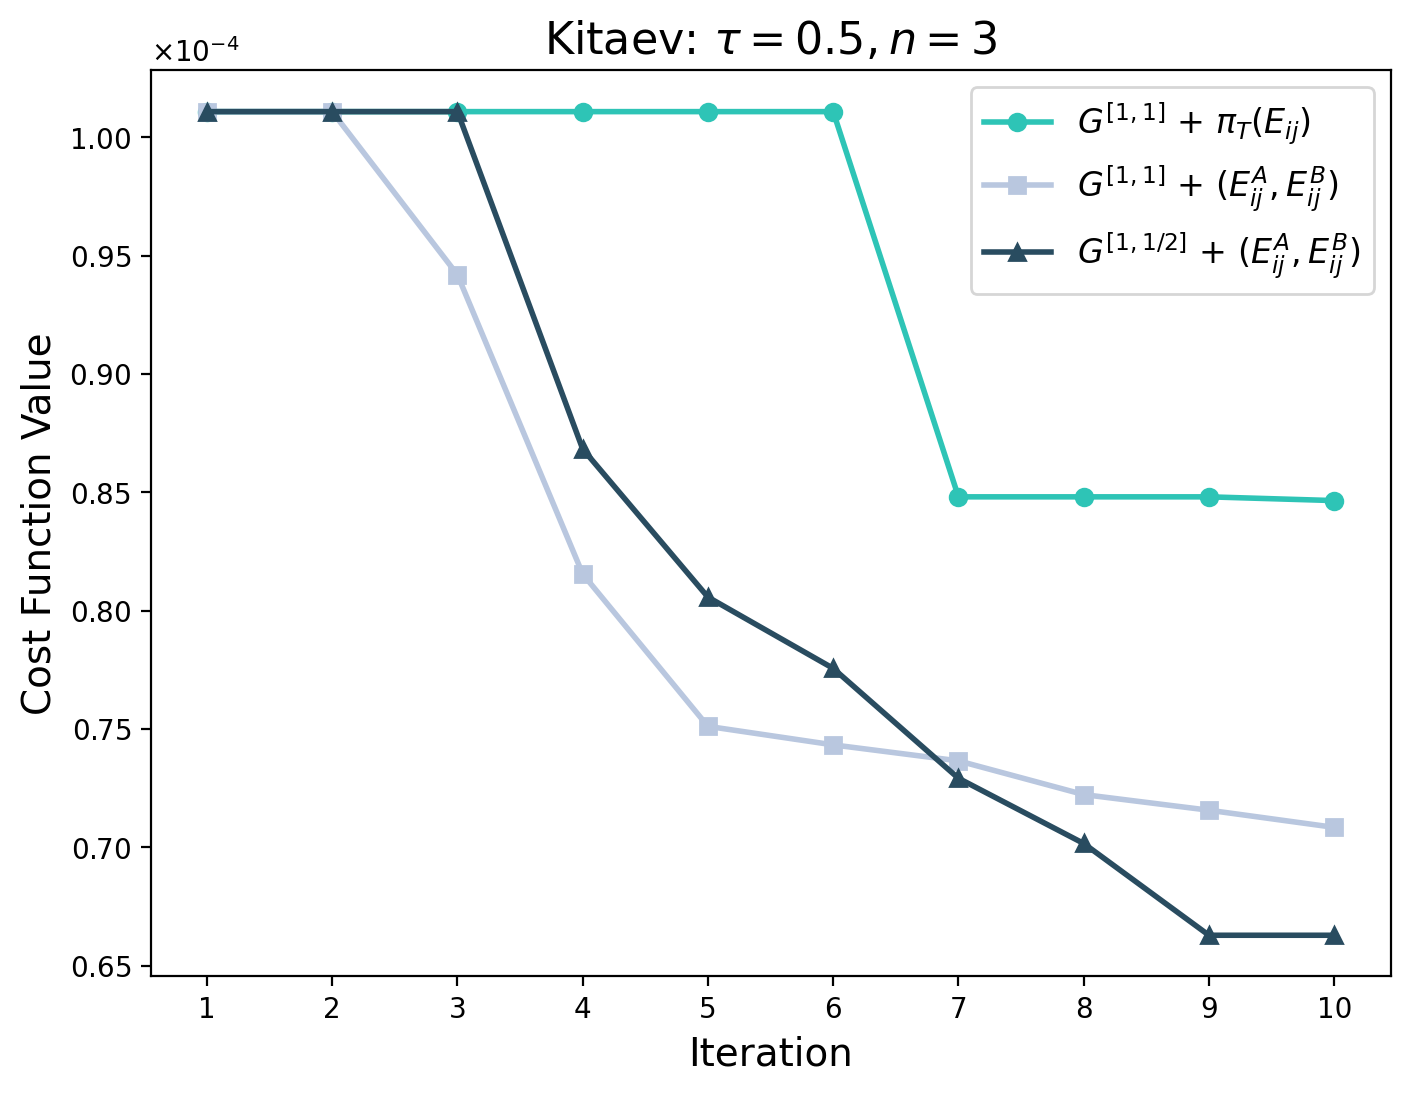

In [135]:
f_kitaev_n3 = [f_opt_euclidean_n3[:10], f_opt_euclidean_elementary_n3, f_opt_n3]

labels = [r'$G^{[1,1]}$ + $\pi_T(E_{ij})$', r'$G^{[1,1]}$ + $(E^A_{ij}, E^B_{ij})$', r'$G^{[1,1/2]}$ + $(E^A_{ij}, E^B_{ij})$']
title = r"Kitaev: $\tau = 0.5,  n = 3$"
fig = plot_pretty(f_kitaev_n3, labels=labels, ylabel="Cost Function Value", xlabel="Iteration", integers=True, title=title, legend_out=False)

fig.savefig('../images/thesis/cost_param_kitaev_n3.pdf')

# Repeat process for Pauli

In [23]:
from opentn.states.qubits import X, Y, Z, I
from opentn.transformations import create_2local_liouvillians
from opentn.optimization import get_general_trotter_local_ansatz
import numpy as np

L0 = np.sqrt(gamma)*(np.kron(X, I) - np.kron(I, X))
L1 = np.sqrt(gamma)*(np.kron(Z, I) - np.kron(I, Z))
Li = [L0, L1]


Lvec_full_pauli, Lvec_odd_pauli, Lvec_even_pauli = create_2local_liouvillians(Li=Li, N=N, d=d, pbc=True)  
exp_Lvec_pauli, exp_Lvec_odd_pauli, exp_Lvec_even_pauli = create_trotter_layers([Lvec_full_pauli, Lvec_odd_pauli, Lvec_even_pauli], tau=tau)

f_stiefel_pauli = lambda xi: frobenius_norm(model_stiefel_local(xi, N, d, ), exp_Lvec_pauli)
grad_stiefel_pauli = lambda xi: gradient_stiefel_vec(xi, f_stiefel_pauli, metric='canonical')
hessian_stiefel_pauli = lambda xi: riemannian_hessian_vec(xi, f_stiefel_pauli, metric='canonical')
xs_pauli = [super2ortho(x.real, rank=10) for x in  get_general_trotter_local_ansatz(lindbladians=Li, tau=tau, n=1)]

In [34]:
xs_opt_pauli, f_opt_pauli, radius_opt_pauli = riemannian_trust_region_optimize(
    f_stiefel_pauli, retract_stiefel, grad_stiefel_pauli, hessian_stiefel_pauli, xs_pauli, save_x=False, niter=30
)

iteration: 0
column : 0
column : 1
column : 2
cost function: 0.11947660276504005
radius 0.02
iteration: 1
column : 0
column : 1
column : 2
cost function: 0.11620637317796416
radius 0.04
iteration: 2
column : 0
column : 1
column : 2
cost function: 0.11192374730659768
radius 0.08
iteration: 3
column : 0
column : 1
column : 2
cost function: 0.10883432244182846
radius 0.1
iteration: 4
column : 0
column : 1
column : 2
cost function: 0.10629284725664734
radius 0.1
iteration: 5
column : 0
column : 1
column : 2
cost function: 0.10459807311919099
radius 0.1
iteration: 6
column : 0
column : 1
column : 2
cost function: 0.10377211905801169
radius 0.1
iteration: 7
column : 0
column : 1
column : 2
cost function: 0.10362776071173231
radius 0.1
iteration: 8
column : 0
column : 1
column : 2
cost function: 0.10075168431867969
radius 0.1
iteration: 9
column : 0
column : 1
column : 2
cost function: 0.09007254189291769
radius 0.1
iteration: 10
column : 0
column : 1
column : 2
cost function: 0.0805322510991

In [26]:
grad_stiefel_euclidean_pauli = lambda xi: gradient_stiefel_vec(xi, f_stiefel_pauli, metric='euclidean')
hessian_stiefel_euclidean_pauli = lambda xi: riemannian_hessian_vec(xi, f_stiefel_pauli, metric='euclidean', stiefel_elementary=False)

In [27]:
xs_opt_euclidean_pauli, f_opt_euclidean_pauli, radius_opt_euclidean_pauli = riemannian_trust_region_optimize(
    f_stiefel_pauli, retract_stiefel, grad_stiefel_euclidean_pauli, hessian_stiefel_euclidean_pauli, xs_pauli, save_x=False, niter=20
)

iteration: 0
column : 0
column : 1
column : 2
cost function: 0.11947660276504005
radius 0.02
iteration: 1
column : 0
column : 1
column : 2
cost function: 0.11620637317796409
radius 0.02
iteration: 2
column : 0
column : 1
column : 2
cost function: 0.11192374730659772
radius 0.02
iteration: 3
column : 0
column : 1
column : 2
cost function: 0.11014166887867897
radius 0.02
iteration: 4
column : 0
column : 1
column : 2
cost function: 0.10895823937371141
radius 0.005
iteration: 5
column : 0
column : 1
column : 2
cost function: 0.10895823937371141
radius 0.005
iteration: 6
column : 0
column : 1
column : 2
cost function: 0.1086837153833574
radius 0.01
iteration: 7
column : 0
column : 1
column : 2
cost function: 0.10842279713595719
radius 0.02
iteration: 8
column : 0
column : 1
column : 2
cost function: 0.10796644294806444
radius 0.005
iteration: 9
column : 0
column : 1
column : 2
cost function: 0.10796644294806444
radius 0.005
iteration: 10
column : 0
column : 1
column : 2
cost function: 0.107

In [29]:
hessian_stiefel_euclidean_elementary_pauli = lambda xi: riemannian_hessian_vec(xi, f_stiefel_pauli, metric='euclidean', stiefel_elementary=True)

In [32]:
xs_opt_euclidean_elementary_pauli, f_opt_euclidean_elementary_pauli, radius_opt_euclidean_elementary_pauli = riemannian_trust_region_optimize(
    f_stiefel_pauli, retract_stiefel, grad_stiefel_euclidean_pauli, hessian_stiefel_euclidean_elementary_pauli, xs_pauli, save_x=False, niter=30
)

iteration: 0
column : 0
column : 1
column : 2
cost function: 0.11947660276504005
radius 0.02
iteration: 1
column : 0
column : 1
column : 2
cost function: 0.11620637317796409
radius 0.04
iteration: 2
column : 0
column : 1
column : 2
cost function: 0.11192374730659772
radius 0.08
iteration: 3
column : 0
column : 1
column : 2
cost function: 0.10883432244182845
radius 0.1
iteration: 4
column : 0
column : 1
column : 2
cost function: 0.10629284725664756
radius 0.1
iteration: 5
column : 0
column : 1
column : 2
cost function: 0.10459807311919103
radius 0.1
iteration: 6
column : 0
column : 1
column : 2
cost function: 0.10377204771993222
radius 0.1
iteration: 7
column : 0
column : 1
column : 2
cost function: 0.10341052626731968
radius 0.1
iteration: 8
column : 0
column : 1
column : 2
cost function: 0.09955324012539205
radius 0.1
iteration: 9
column : 0
column : 1
column : 2
cost function: 0.08821834750246291
radius 0.1
iteration: 10
column : 0
column : 1
column : 2
cost function: 0.0794433204198

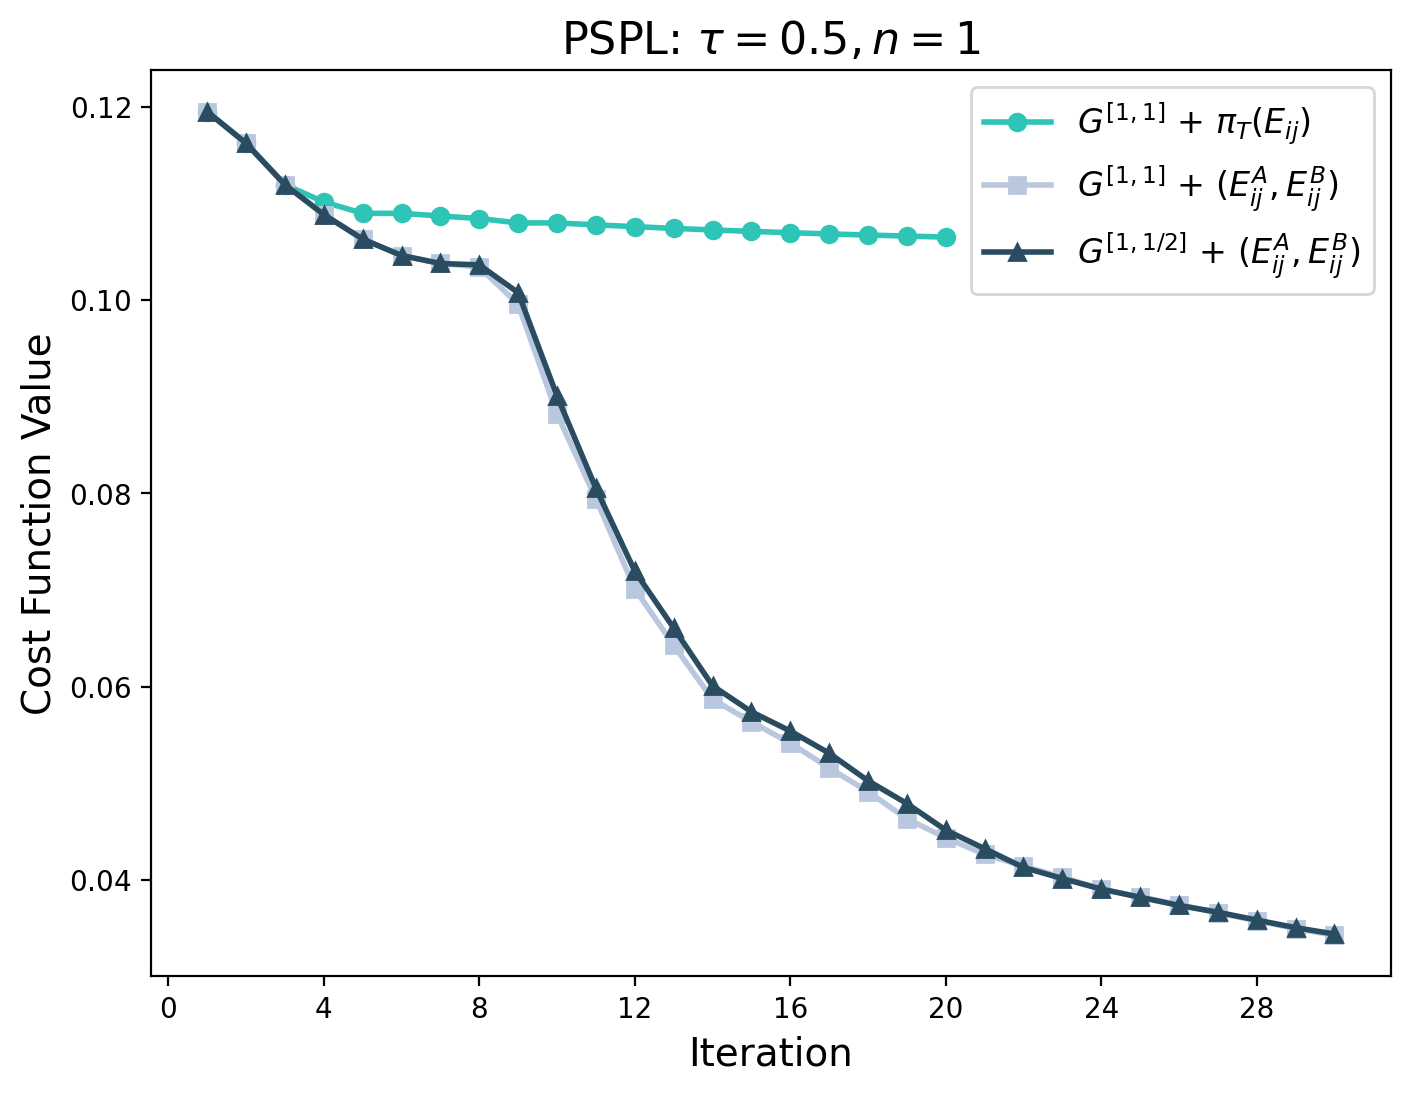

In [136]:
f_pauli_n1 = [f_opt_euclidean_pauli, f_opt_euclidean_elementary_pauli, f_opt_pauli]

labels = [r'$G^{[1,1]}$ + $\pi_T(E_{ij})$', r'$G^{[1,1]}$ + $(E^A_{ij}, E^B_{ij})$',r'$G^{[1,1/2]}$ + $(E^A_{ij}, E^B_{ij})$']
title = r"PSPL: $\tau = 0.5,  n = 1$"
fig = plot_pretty(f_pauli_n1, labels=labels, ylabel="Cost Function Value", xlabel="Iteration", integers=True, title=title, legend_out=False)
fig.savefig('../images/thesis/cost_param_pspl_n1.pdf')

# Let's try increasing the number of timesteps here as well

In [50]:
xs_pauli_n2 = [super2ortho(x.real, rank=10) for x in  get_general_trotter_local_ansatz(lindbladians=Li, tau=tau, n=2)]

In [52]:
xs_opt_pauli_n2, f_opt_pauli_n2, radius_opt_pauli_n2 = riemannian_trust_region_optimize(
    f_stiefel_pauli, retract_stiefel, grad_stiefel_pauli, hessian_stiefel_pauli, xs_pauli_n2, save_x=False, niter=10
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.03765706829157736
radius 0.02
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.03530426050471679
radius 0.04
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.033670400199704374
radius 0.08
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.031223735966945942
radius 0.1
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.027952102669026268
radius 0.1
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.02517985550233217
radius 0.1
iteration: 6
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.023955975051818765
radius 0.1
iteration: 7
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.02368444626250086
radius 0.1
iteration: 8
column : 0
column : 1
column : 2
column : 3
column : 4
cost function

In [53]:
xs_opt_euclidean_elementary_pauli_n2, f_opt_euclidean_elementary_pauli_n2, radius_opt_euclidean_elementary_pauli_n2 = riemannian_trust_region_optimize(
    f_stiefel_pauli, retract_stiefel, grad_stiefel_euclidean_pauli, hessian_stiefel_euclidean_elementary_pauli, xs_pauli_n2, save_x=False, niter=10
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.03765706829157736
radius 0.02
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.03530426050471652
radius 0.04
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.03367040019970428
radius 0.08
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.031223735966946064
radius 0.1
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.02795210266902618
radius 0.1
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.025179855502332607
radius 0.1
iteration: 6
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.02395708314006471
radius 0.1
iteration: 7
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 0.02369805583732109
radius 0.1
iteration: 8
column : 0
column : 1
column : 2
column : 3
column : 4
cost function: 

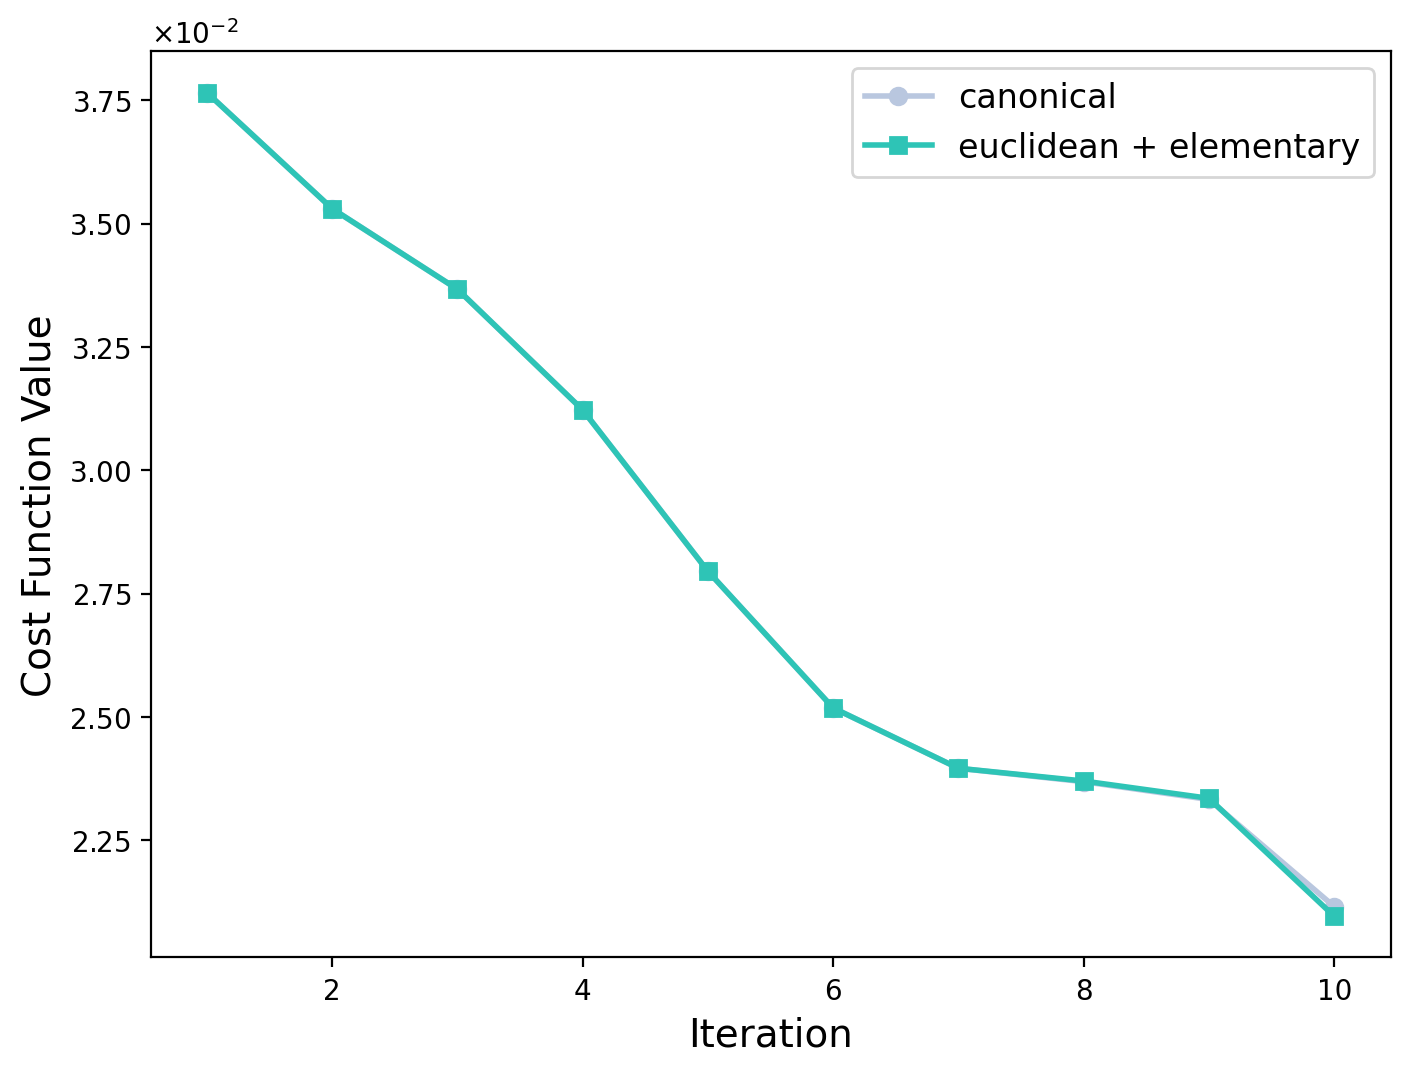

In [75]:
f_pauli_n2 = [f_opt_pauli_n2, f_opt_euclidean_elementary_pauli_n2]
labels = ['canonical', 'euclidean + elementary']
fig = plot_pretty(f_pauli_n2, labels=labels, ylabel="Cost Function Value", xlabel="Iteration")

In [71]:
xs_pauli_n3 = [super2ortho(x.real, rank=10) for x in  get_general_trotter_local_ansatz(lindbladians=Li, tau=tau, n=3)]

In [72]:
xs_opt_pauli_n3, f_opt_pauli_n3, radius_opt_pauli_n3 = riemannian_trust_region_optimize(
    f_stiefel_pauli, retract_stiefel, grad_stiefel_pauli, hessian_stiefel_pauli, xs_pauli_n3, save_x=False, niter=10
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.018028420754429408
radius 0.02
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.016581803914970956
radius 0.04
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.015811804779001265
radius 0.08
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.014272833583396446
radius 0.1
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.012034380074395527
radius 0.1
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.010752319700239907
radius 0.1
iteration: 6
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.010022661339279664
radius 0.1
iteration: 7
column : 0
column : 1
col

In [76]:
xs_opt_euclidean_elementary_pauli_n3, f_opt_euclidean_elementary_pauli_n3, radius_opt_euclidean_elementary_pauli_n3 = riemannian_trust_region_optimize(
    f_stiefel_pauli, retract_stiefel, grad_stiefel_euclidean_pauli, hessian_stiefel_euclidean_elementary_pauli, xs_pauli_n3, save_x=False, niter=10
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.018028420754429408
radius 0.02
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.016581803914970855
radius 0.04
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.015811804779000998
radius 0.08
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.014272833583396321
radius 0.1
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.01203438007440252
radius 0.1
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.0107689328067072
radius 0.1
iteration: 6
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
cost function: 0.010115768568306331
radius 0.1
iteration: 7
column : 0
column : 1
column

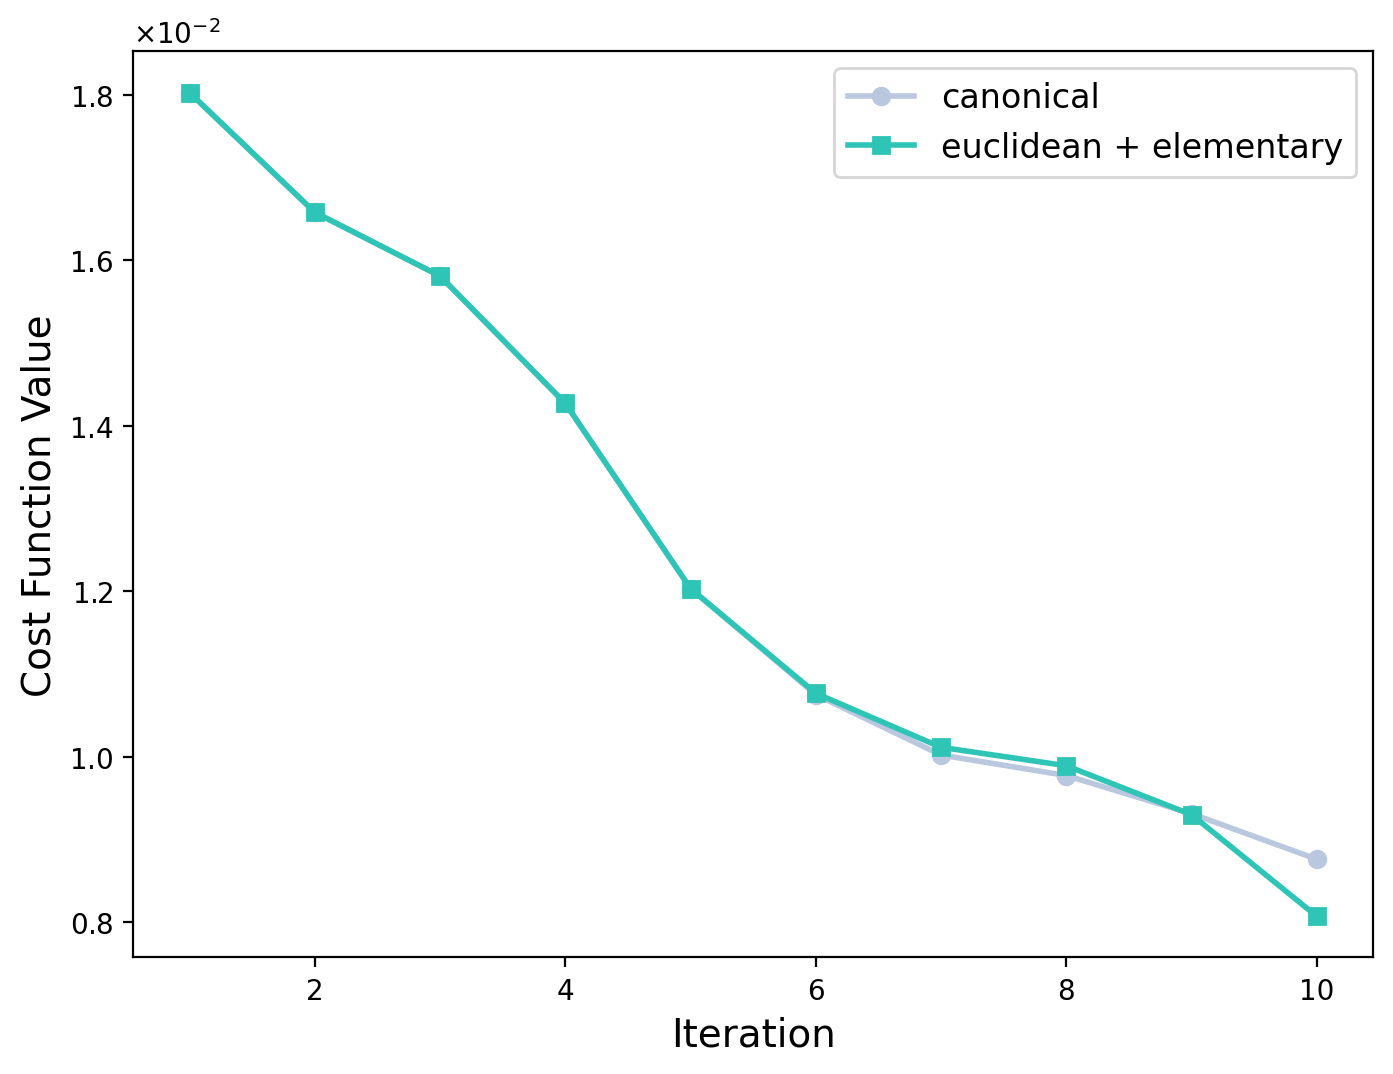

In [77]:
f_pauli_n3 = [f_opt_pauli_n3, f_opt_euclidean_elementary_pauli_n3]
labels = ['canonical', 'euclidean + elementary']
fig = plot_pretty(f_pauli_n3, labels=labels, ylabel="Cost Function Value", xlabel="Iteration")

In [85]:
xs_pauli_n4 = [super2ortho(x.real, rank=10) for x in  get_general_trotter_local_ansatz(lindbladians=Li, tau=tau, n=4)]

In [86]:
xs_opt_pauli_n4, f_opt_pauli_n4, radius_opt_pauli_n4 = riemannian_trust_region_optimize(
    f_stiefel_pauli, retract_stiefel, grad_stiefel_pauli, hessian_stiefel_pauli, xs_pauli_n4, save_x=False, niter=10
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.010464435571567557
radius 0.02
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.009420876193976486
radius 0.04
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.008590507842190787
radius 0.08
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.007436429134969581
radius 0.08
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.006280481529587713
radius 0.08
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.005737673792421314
radius 0.08
iteration: 6
column : 0
column : 1
colum

In [89]:
xs_opt_pauli_n4_2, f_opt_pauli_n4_2, radius_opt_pauli_n4_2 = riemannian_trust_region_optimize(
    f_stiefel_pauli, retract_stiefel, grad_stiefel_pauli, hessian_stiefel_pauli, xs_opt_pauli_n4[-1], save_x=False, niter=5, radius_init=radius_opt_pauli_n4
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.003761096157373582
radius 0.04
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.003509214977301907
radius 0.01
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.0033056132248943716
radius 0.01
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.002882810188156432
radius 0.02
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.0027049457552610497
radius 0.04


In [116]:
xs_opt_pauli_n4_3, f_opt_pauli_n4_3, radius_opt_pauli_n4_3 = riemannian_trust_region_optimize(
    f_stiefel_pauli, retract_stiefel, grad_stiefel_pauli, hessian_stiefel_pauli, xs_opt_pauli_n4_2[-1], save_x=False, niter=5, radius_init=radius_opt_pauli_n4_2
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.0026138832786939863
radius 0.08
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.0024681826610979908
radius 0.08
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.0023926138798668053
radius 0.02
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.0023926138798668053
radius 0.04
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.002065701646202355
radius 0.04


In [123]:
xs_opt_euclidean_pauli_n4, f_opt_euclidean_pauli_n4, radius_opt_euclidean_pauli_n4 = riemannian_trust_region_optimize(
    f_stiefel_pauli, retract_stiefel, grad_stiefel_euclidean_pauli, hessian_stiefel_euclidean_pauli, xs_pauli_n4, save_x=False, niter=10
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.010464435571567557
radius 0.0025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.009967351876861328
radius 0.0025
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.009673610741427707
radius 0.000625
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.009611904038901194
radius 0.00125
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.009498075879812228
radius 0.00125
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.009445553474827688
radius 0.0003125
iteration: 6
column :

In [84]:
xs_opt_euclidean_elementary_pauli_n4, f_opt_euclidean_elementary_pauli_n4, radius_opt_euclidean_elementary_pauli_n4 = riemannian_trust_region_optimize(
    f_stiefel_pauli, retract_stiefel, grad_stiefel_euclidean_pauli, hessian_stiefel_euclidean_elementary_pauli, xs_pauli_n4, save_x=False, niter=10
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.010464435571567557
radius 0.02
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.009420876193976626
radius 0.04
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.00859050784219096
radius 0.08
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.007436429134969507
radius 0.08
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.006277780133962023
radius 0.08
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.005753587725227248
radius 0.1
iteration: 6
column : 0
column : 1
column 

In [120]:
xs_opt_euclidean_elementary_pauli_n4_2, f_opt_euclidean_elementary_pauli_n4_2, radius_opt_euclidean_elementary_pauli_n4_2 = riemannian_trust_region_optimize(
    f_stiefel_pauli, retract_stiefel, grad_stiefel_euclidean_pauli, hessian_stiefel_euclidean_elementary_pauli, xs_opt_euclidean_elementary_pauli_n4[-1], save_x=False, niter=10, radius_init=radius_opt_euclidean_elementary_pauli_n4
)

iteration: 0
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.0038549146256688814
radius 0.025
iteration: 1
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.003437136090747311
radius 0.025
iteration: 2
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.003061012850820425
radius 0.05
iteration: 3
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.002787638165311237
radius 0.05
iteration: 4
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.002568142884730373
radius 0.1
iteration: 5
column : 0
column : 1
column : 2
column : 3
column : 4
column : 5
column : 6
column : 7
column : 8
cost function: 0.0022951840643949013
radius 0.025
iteration: 6
column : 0
column : 1
c

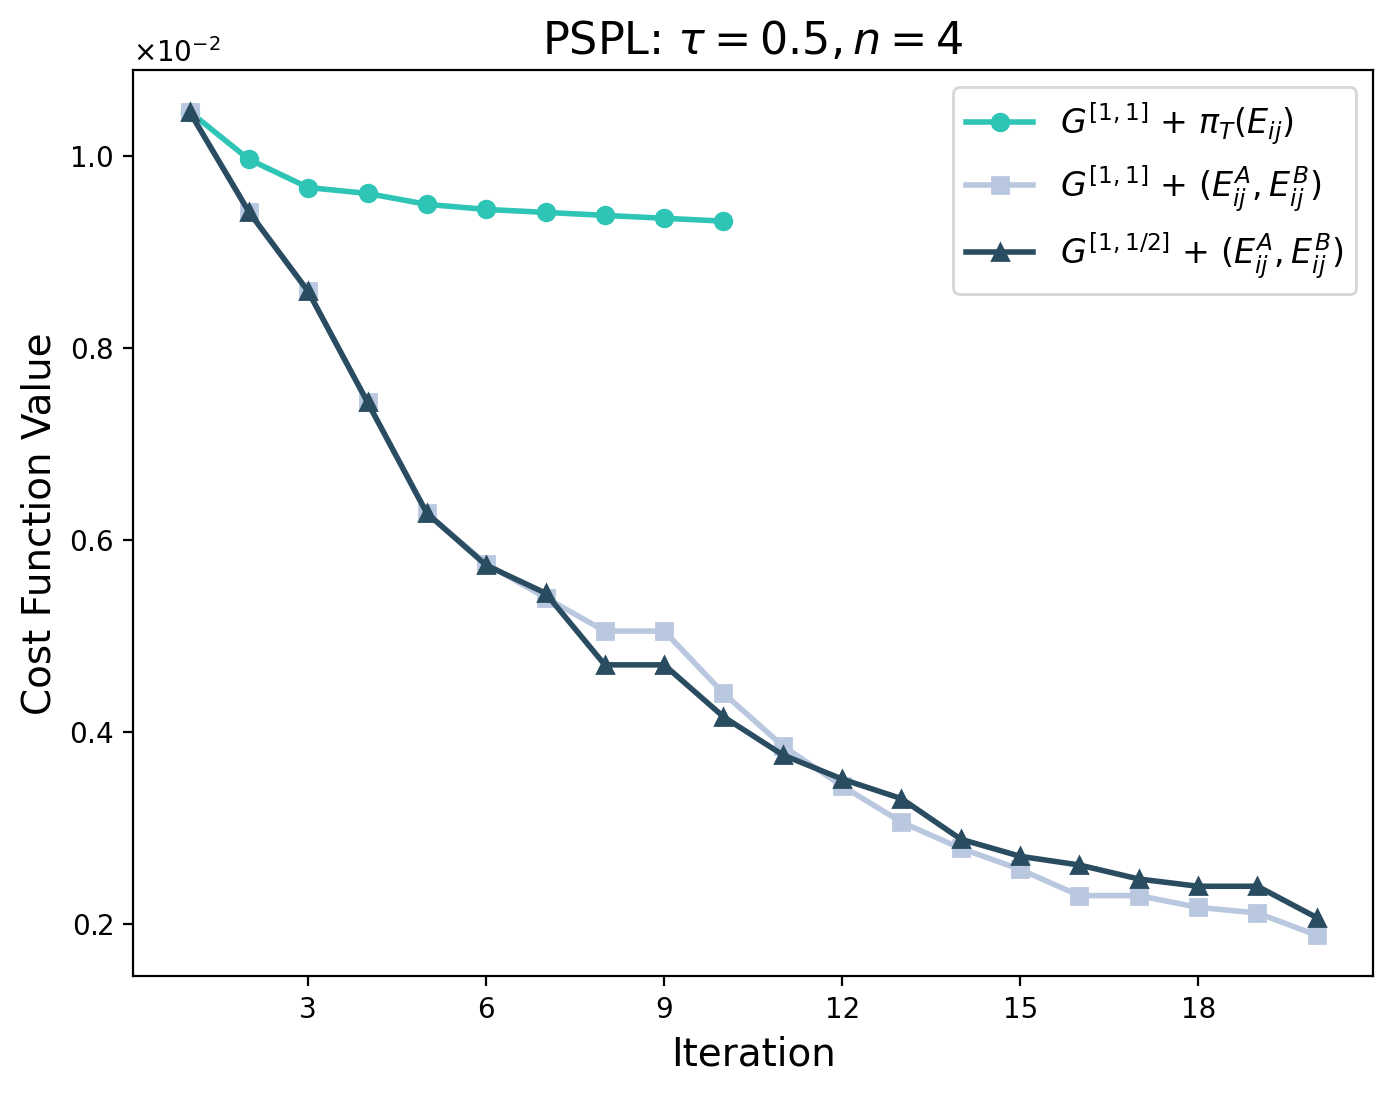

In [137]:
f_pauli_n4 = [ f_opt_euclidean_pauli_n4 ,f_opt_euclidean_elementary_pauli_n4 + f_opt_euclidean_elementary_pauli_n4_2, f_opt_pauli_n4 + f_opt_pauli_n4_2 + f_opt_pauli_n4_3,]

labels = [r'$G^{[1,1]}$ + $\pi_T(E_{ij})$', r'$G^{[1,1]}$ + $(E^A_{ij}, E^B_{ij})$',r'$G^{[1,1/2]}$ + $(E^A_{ij}, E^B_{ij})$']
title = r"PSPL: $\tau = 0.5,  n = 4$"
fig = plot_pretty(f_pauli_n4, labels=labels, ylabel="Cost Function Value", xlabel="Iteration", integers=True, title=title, legend_out=False)
fig.savefig('../images/thesis/cost_param_pspl_n4.pdf')